# Basic imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import master_functions as mf

In [3]:
df = pd.read_pickle('main_df.pkl')
learning_df = pd.read_csv('test/dfs&results/learning_df.tsv', sep='\t')
X_learning = learning_df.drop(['virus', 'host', 'group', 'group_code', 'y'], axis=1)
y_learning = learning_df['y'].to_numpy()
groups = learning_df['group_code'].to_numpy()

In [3]:
from joblib import load
res = load('test/dfs&results/results_small.joblib')

# GridSearchCV

## Random Forest

Define params

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state=1)
params = {
    'max_depth':[2, 4, 6, 8, 10], 
}
logo = LeaveOneGroupOut()


Perform GridSearch

In [11]:
clf_rfc = GridSearchCV(rfc, params, cv=logo, scoring='f1', n_jobs=-1, verbose=3)
clf_rfc.fit(X_learning, y_learning, groups=groups)

Fitting 48 folds for each of 5 candidates, totalling 240 fits


GridSearchCV(cv=LeaveOneGroupOut(),
             estimator=RandomForestClassifier(criterion='entropy',
                                              n_estimators=200,
                                              random_state=1),
             n_jobs=-1, param_grid={'max_depth': [2, 4, 6, 8, 10]},
             scoring='f1', verbose=3)

In [13]:
clf_rfc.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=200,
                       random_state=1)

In [12]:
clf_rfc.best_score_

0.6333485954709469

Save the results to file

In [ ]:
'''
from joblib import dump
dump(clf_rfc, 'test/dfs&results/clf_rfc.joblib')
'''

['test/clf.joblib']

## Logistic Regression

Define params

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.linear_model import LogisticRegression

logo = LeaveOneGroupOut()
params = {'penalty': ['none', 'l1', 'l2', 'elasticnet'],
            'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5],
            'class_weight': [{0:1, 1:1}, {0:1, 1:1.5}, {0:1, 1:2}],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

lrc = LogisticRegression()

In [9]:
clf_lrc = GridSearchCV(lrc, params, scoring='f1', cv=logo, n_jobs=-1, verbose=2)
clf_lrc.fit(X_learning, y_learning, groups=groups)

Fitting 48 folds for each of 480 candidates, totalling 23040 fits


C:\Users\misia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10368 fits failed out of a total of 23040.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1152 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\misia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\misia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\misia\AppData\Local\Progr

GridSearchCV(cv=LeaveOneGroupOut(), estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 1.5},
                                          {0: 1, 1: 2}],
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='f1', verbose=2)

Perform gridsearch

In [10]:
from joblib import dump
dump(clf_lrc, 'test/gridsearch_results/clf_lrc.joblib')

['test/gridsearch_results/clf_lrc.joblib']

In [11]:
clf_lrc.best_estimator_

LogisticRegression(C=0.001, class_weight={0: 1, 1: 1}, solver='liblinear')

In [12]:
clf_lrc.best_score_

0.6658380481998344

## SVM

Define params

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

pipe = Pipeline([
    ('normalize', Normalizer()),
    ('svc', SVC())])

logo = LeaveOneGroupOut()
params = {
    'svc__C': [0.01, 0.1, 1, 10],
    'svc__kernel': ['rbf', 'poly']
}

Perform gridsearch

In [4]:
clf_svc = GridSearchCV(pipe, params, cv=logo, scoring='f1', n_jobs=-1, verbose=3)
clf_svc.fit(X_learning, y_learning, groups=groups)

Fitting 48 folds for each of 8 candidates, totalling 384 fits


GridSearchCV(cv=LeaveOneGroupOut(),
             estimator=Pipeline(steps=[('normalize', Normalizer()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__C': [0.01, 0.1, 1, 10],
                         'svc__kernel': ['rbf', 'poly']},
             scoring='f1', verbose=3)

In [18]:
clf_svc.best_estimator_

Pipeline(steps=[('normalize', Normalizer()), ('svc', SVC(C=0.1))])

In [19]:
clf_svc.best_score_

0.5842960595426597

Save results

In [5]:
'''
from joblib import dump
dump(clf_svc, 'test/dfs&results/clf_svc.joblib')
'''

['test/svc.joblib']

## LinearSVC

Define parameters

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

logo = LeaveOneGroupOut()
pipe = Pipeline([
    ('normalize', Normalizer()),
    ('svc', LinearSVC())
])

params = {
    'svc__loss': ['hinge', 'squared_hinge'],
    'svc__C': [0.01, 0.1, 1],
    'svc__class_weight': [{0:1, 1:1},{0:1, 1:1.5}, {0:1, 1:2}]
}

Perform gridsearch

In [6]:
clf_lin_svc = GridSearchCV(pipe, params, cv=logo, scoring='f1', n_jobs=-1, verbose=2, return_train_score=True)
clf_lin_svc.fit(X_learning, y_learning, groups=groups)

Fitting 48 folds for each of 18 candidates, totalling 864 fits


GridSearchCV(cv=LeaveOneGroupOut(),
             estimator=Pipeline(steps=[('normalize', Normalizer()),
                                       ('svc', LinearSVC())]),
             n_jobs=-1,
             param_grid={'svc__C': [0.01, 0.1, 1],
                         'svc__class_weight': [{0: 1, 1: 1}, {0: 1, 1: 1.5},
                                               {0: 1, 1: 2}],
                         'svc__loss': ['hinge', 'squared_hinge']},
             return_train_score=True, scoring='f1', verbose=2)

In [5]:
clf_lin_svc.best_estimator_

Pipeline(steps=[('normalize', Normalizer()),
                ('svc', LinearSVC(C=0.01, class_weight={0: 1, 1: 1.5}))])

In [6]:
clf_lin_svc.best_score_

0.5870551697976326

Save results

In [7]:
from joblib import dump
dump(clf_lin_svc, 'test/gridsearch_results/clf_lin_svc.joblib')

['test/gridsearch_results/clf_lin_svc.joblib']

## SGD 

Define parameters

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier

logo = LeaveOneGroupOut()
pipe = Pipeline([
    ('normalize', Normalizer()),
    ('sgd', SGDClassifier())
])

params = {
    'sgd__loss': ['hinge', 'squared_hinge', 'log'],
    'sgd__learning_rate': ['constant', 'optimal', 'adaptive'],
    'sgd__class_weight': [{0:1, 1:1},{0:1, 1:1.5}, {0:1, 1:2}],
    'sgd__penalty': ['l2', 'l1', 'elasticnet'],
    'sgd__alpha': [0.0001, 0.0005, 0.001]
}

Perform gridsearch

In [9]:
clf_lin_sgd = GridSearchCV(pipe, params, cv=logo, scoring='f1', n_jobs=-1, verbose=2, return_train_score=True)
clf_lin_sgd.fit(X_learning, y_learning, groups=groups)

Fitting 48 folds for each of 243 candidates, totalling 11664 fits


C:\Users\misia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
7776 fits failed out of a total of 11664.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7776 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\misia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\misia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\misia\AppData\Local\Programs\Python\Python310

GridSearchCV(cv=LeaveOneGroupOut(),
             estimator=Pipeline(steps=[('normalize', Normalizer()),
                                       ('sgd', SGDClassifier())]),
             n_jobs=-1,
             param_grid={'sgd__alpha': [0.0001, 0.0005, 0.001],
                         'sgd__class_weight': [{0: 1, 1: 1}, {0: 1, 1: 1.5},
                                               {0: 1, 1: 2}],
                         'sgd__learning_rate': ['constant', 'optimal',
                                                'adaptive'],
                         'sgd__loss': ['hinge', 'squared_hinge', 'log'],
                         'sgd__penalty': ['l2', 'l1', 'elasticnet']},
             return_train_score=True, scoring='f1', verbose=2)

In [10]:
clf_lin_sgd.best_estimator_

Pipeline(steps=[('normalize', Normalizer()),
                ('sgd',
                 SGDClassifier(alpha=0.0005, class_weight={0: 1, 1: 1},
                               loss='log', penalty='l1'))])

In [11]:
clf_lin_sgd.best_score_

0.5923126657913448

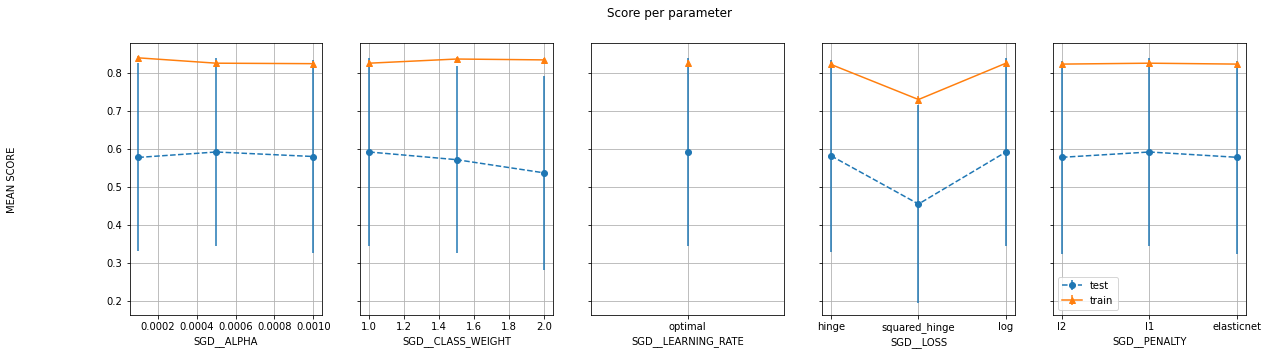

In [12]:
plot_all_gridsearch_results(clf_lin_sgd)

## KNN

Define params

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer

pipe = Pipeline([
    ('normalize', Normalizer()),
    ('knn', KNeighborsClassifier(algorithm='kd_tree'))
])

params = {
    'knn__leaf_size': [5, 10, 15, 20, 25, 30, 35, 40]
}

Perform gridsearch

In [27]:
clf_knn = GridSearchCV(pipe, params, cv=logo, scoring='f1', n_jobs=-1, verbose=1)
clf_knn.fit(X_learning, y_learning, groups=groups)

Fitting 48 folds for each of 8 candidates, totalling 384 fits


GridSearchCV(cv=LeaveOneGroupOut(),
             estimator=Pipeline(steps=[('normalize', Normalizer()),
                                       ('knn',
                                        KNeighborsClassifier(algorithm='kd_tree'))]),
             n_jobs=-1,
             param_grid={'knn__leaf_size': [5, 10, 15, 20, 25, 30, 35, 40]},
             scoring='f1', verbose=1)

In [28]:
clf_knn.best_estimator_

Pipeline(steps=[('normalize', Normalizer()),
                ('knn',
                 KNeighborsClassifier(algorithm='kd_tree', leaf_size=5))])

In [29]:
clf_knn.best_score_

0.5604762097243333

Save results

In [15]:
'''
dump(clf_knn, 'test/dfs&results/clf_knn.joblib')
'''

['test/clf_knn.joblib']

## XGboost

Define params

In [4]:
from sklearn.model_selection import LeaveOneGroupOut, cross_validate
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier()
logo = LeaveOneGroupOut()
params = {
    'eta': [0.1, 0.3, 0.5, 0.7],
    'gamma': [0, 0.25, 0.5],
    'max_depth': [2, 4, 6, 8, 10],
    'min_child_weight': [1, 3, 5]
}

Perform GridSearchCV

In [5]:
clf_xgb = GridSearchCV(xgb, params, cv=logo, n_jobs=-1, scoring='f1', verbose=10)
clf_xgb.fit(X_learning, y_learning, groups=groups)

Fitting 48 folds for each of 180 candidates, totalling 8640 fits


GridSearchCV(cv=LeaveOneGroupOut(),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, ma...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n

In [7]:
from joblib import dump
dump(clf_xgb, 'test/dfs&results/clf_xgb.joblib')

['test/dfs&results/clf_xgb.joblib']

In [8]:
clf_xgb.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False, eta=0.3,
              eval_metric=None, gamma=0.5, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=3,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, ...)

In [9]:
clf_xgb.best_score_

0.6283087802463467

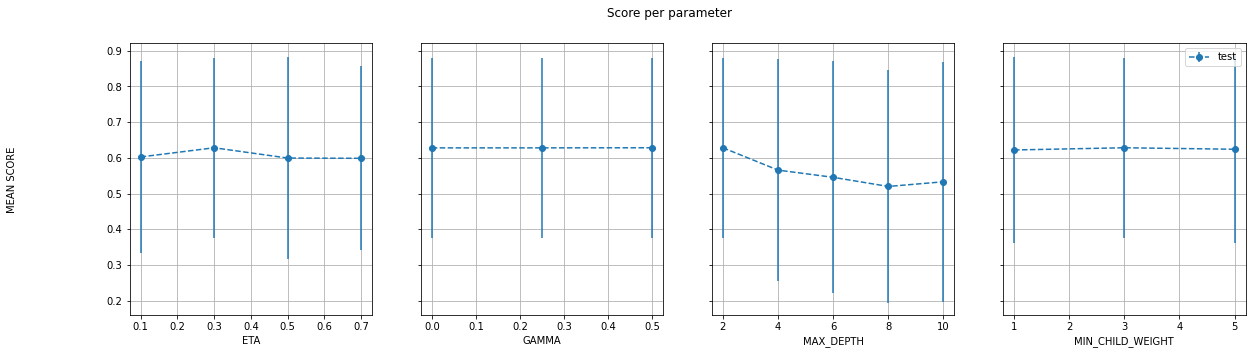

In [11]:
mf.plot_all_gridsearch_results(clf_xgb)

# Examine the results

In [10]:
from joblib import load
clf_rfc = load('test/dfs&results/clf_rfc.joblib')

FileNotFoundError: [Errno 2] No such file or directory: 'test/dfs&results/clf_rfc.joblib'

In [9]:
clf_rfc.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=200,
                       random_state=1)

In [13]:
clf_rfc.best_score_

0.6089659670541102

In [14]:
clf_rfc.best_params_

{'max_depth': 10, 'n_estimators': 200}

In [15]:
clf_rfc.scorer_

make_scorer(f1_score, average=binary)

In [16]:
clf_rfc.n_splits_

48

#### Visualisations

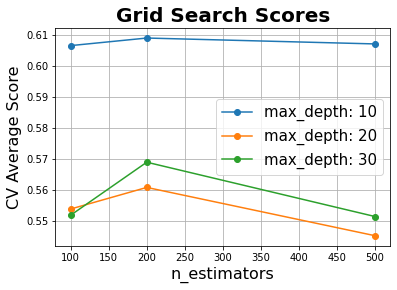

In [38]:
plot_grid_search(clf_rfc.cv_results_, params['n_estimators'], params['max_depth'], 'n_estimators', 'max_depth')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


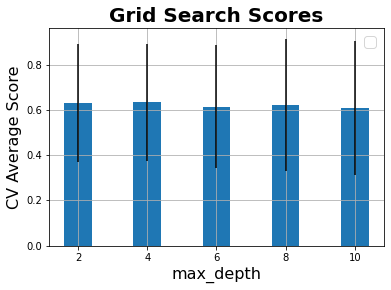

In [49]:
plot_grid_search_one_param(clf_rfc.cv_results_, params['max_depth'], 'max_depth')

In [50]:
clf_rfc.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=200,
                       random_state=1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


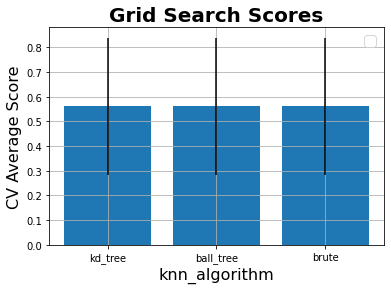

In [26]:
plot_grid_search_one_param(clf_knn.cv_results_, params['knn__algorithm'], 'knn_algorithm')

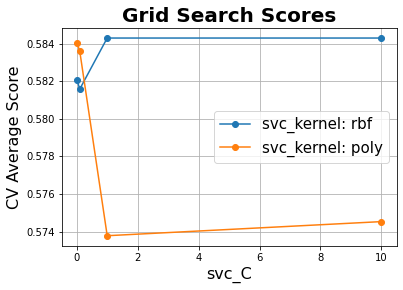

In [30]:
plot_grid_search(clf_svc.cv_results_, params['svc__C'], params['svc__kernel'], 'svc_C', 'svc_kernel')

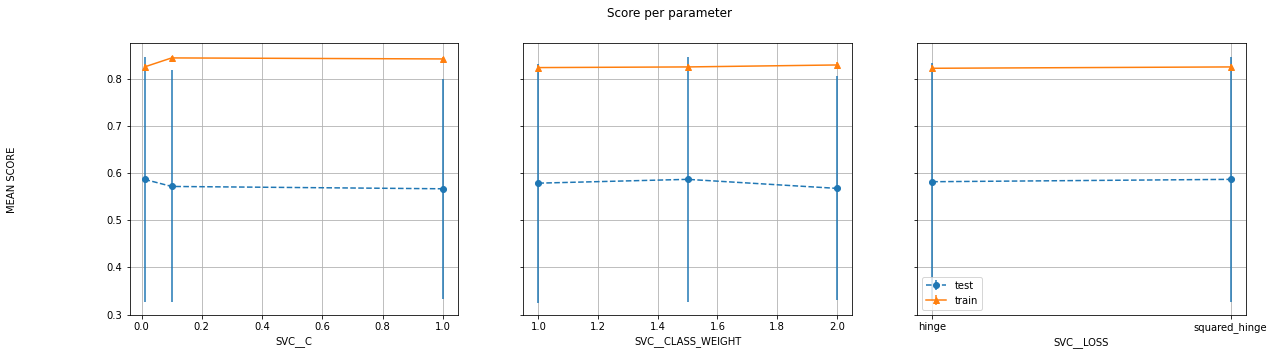

In [28]:
plot_all_gridsearch_results(clf_lin_svc)

In [29]:
clf_lin_svc.best_estimator_

Pipeline(steps=[('normalize', Normalizer()),
                ('svc', LinearSVC(C=0.01, class_weight={0: 1, 1: 1.5}))])

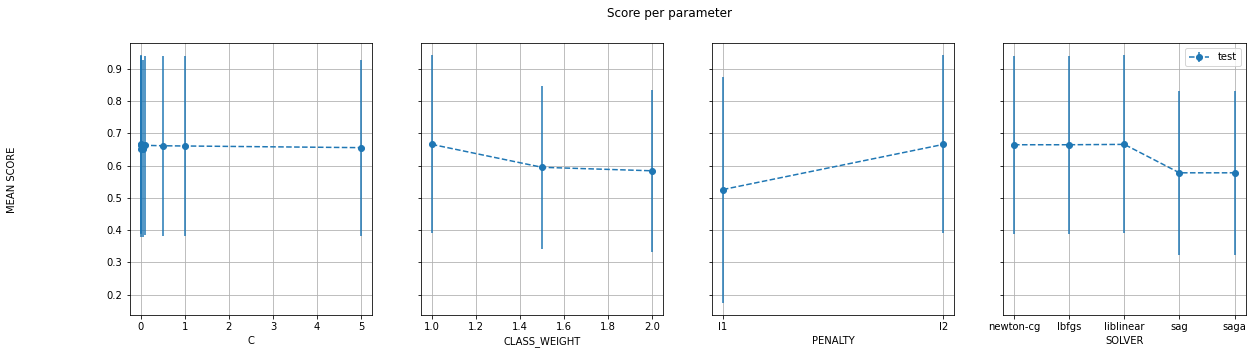

In [15]:
plot_all_gridsearch_results(clf_lrc)